In [1]:
import pickle
import requests
import json

## Call Expected timefraction 

In [6]:

url = 'https://ra7bb7007.studio.scaleoutsystems.com/predict/'
lower_bound = 1.1
upper_bound = 1.3
time_horizon = 100

inp = {
    "prediction_type": "Expected_timefraction",  
    "lower_bound": lower_bound,
    "upper_bound": upper_bound,
    "time_fraction": 0.5, 
    "time_horizon": time_horizon
}

res = requests.post(url, headers = {'Content-type': 'application/json'}, json=inp)
#print(res)
print(json.loads(res.json()))


{'Expected_timefraction': 0.18147494361086594}


## Call Best range 

In [7]:

lower_bound = 1.1
upper_bound = 1.3
time_horizon = 100

inp = {
    "prediction_type": "best_range",  
    "lower_bound": lower_bound,
    "upper_bound": upper_bound,
    "time_fraction": 0.5, 
    "time_horizon": time_horizon
}
res = requests.post(url, headers = {'Content-type': 'application/json'}, json=inp)
#print(res)
print(json.loads(res.json()))

{'Best range': [0.8400000000000001, 1.3800000000000001]}


In [8]:
### Call Best range for timefraction 0,5 and 0.25  and plot some visuals

Text(0.5, 1.0, 'Time horizon 30 days, 0:00:00days')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


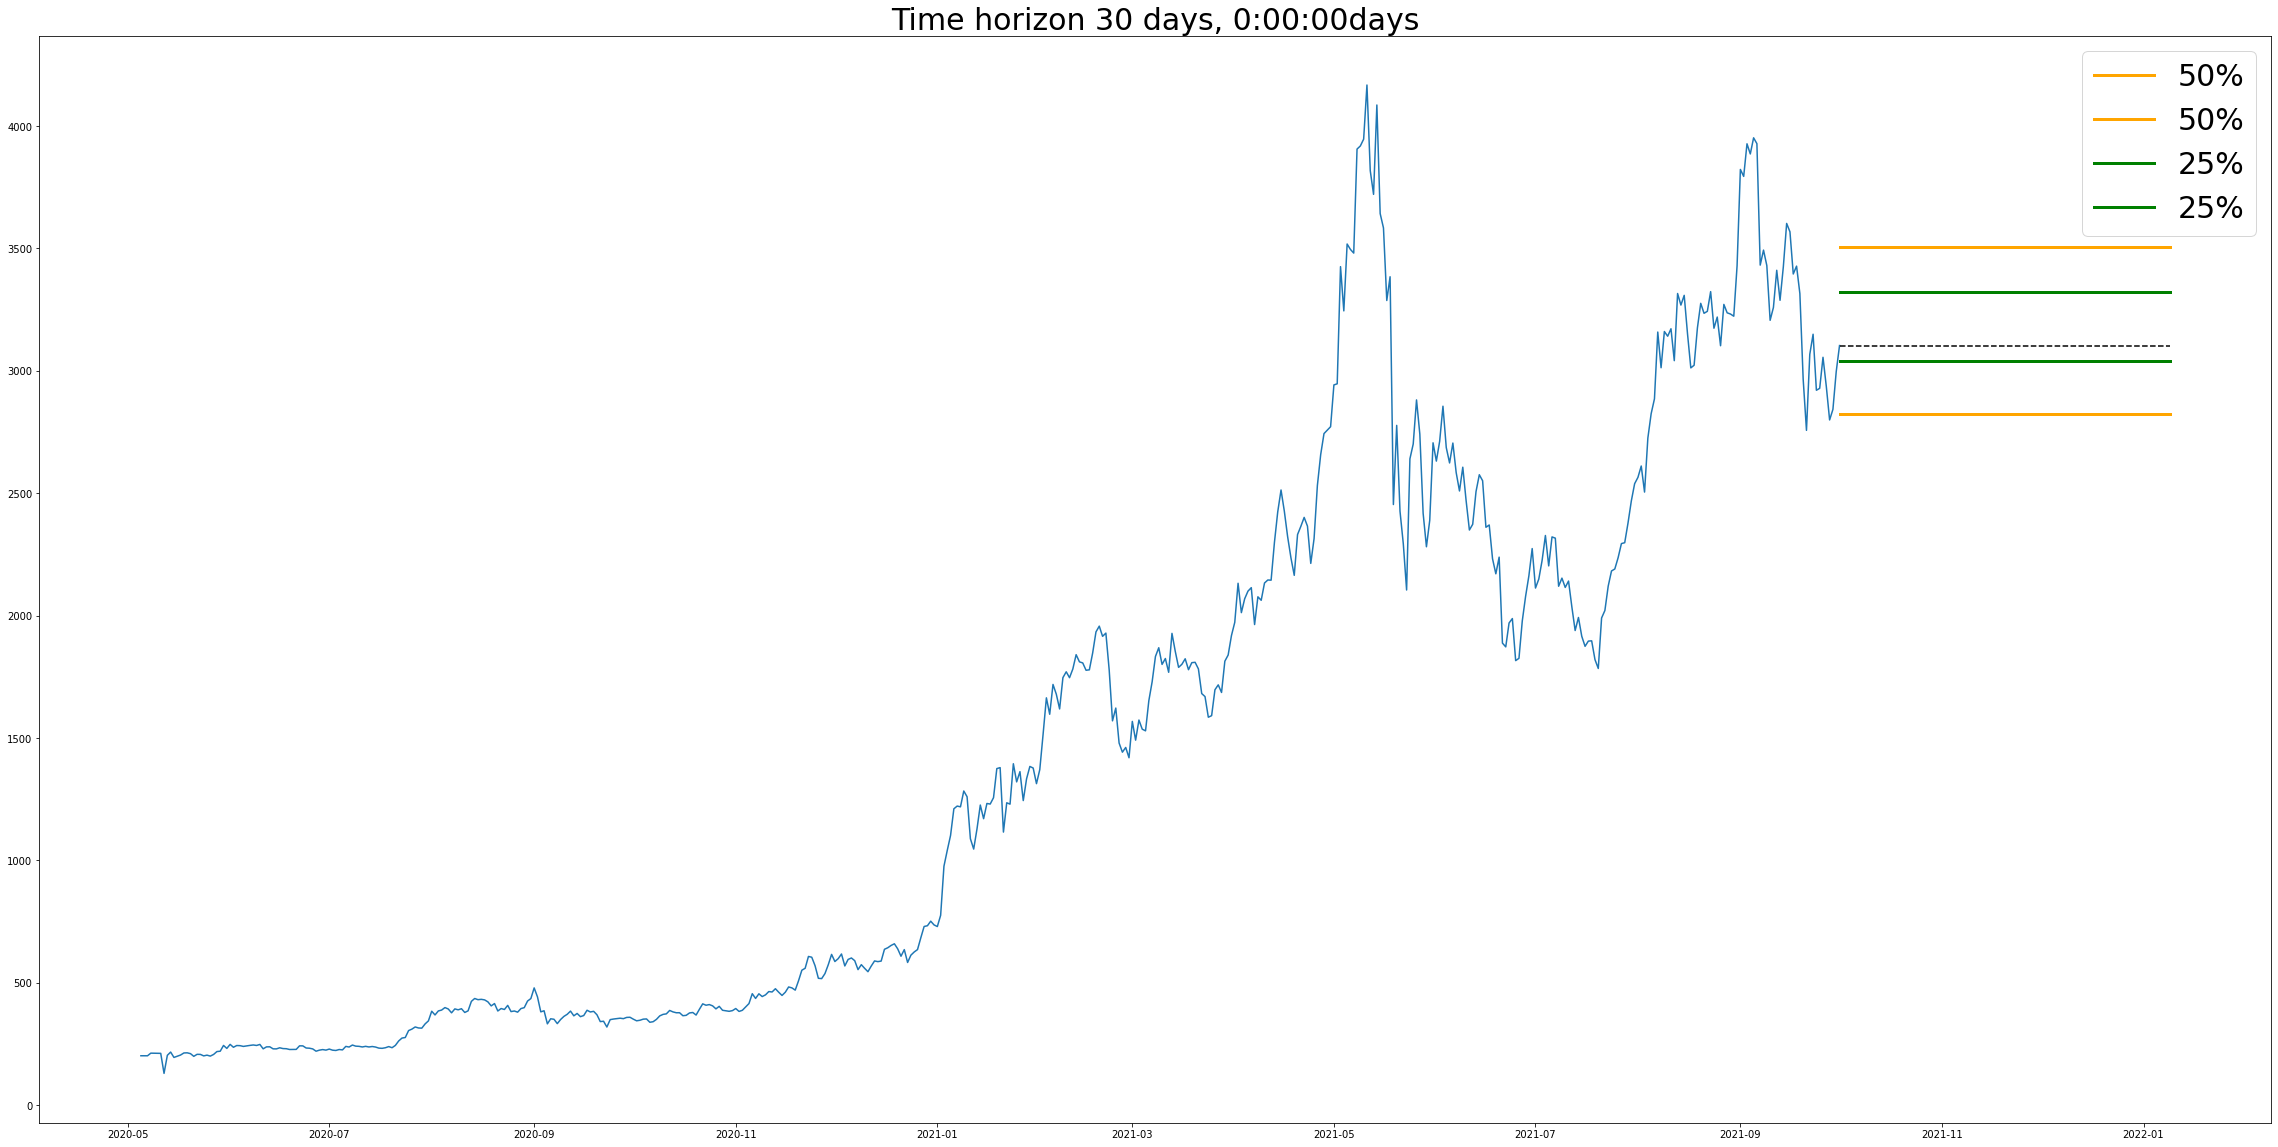

In [10]:
from src.models.import_ethereum_timeseries import ethereum_data
from matplotlib import pylab as plt
import matplotlib
f, ax = plt.subplots(1,1,figsize=(40,20))
time, eth_value = ethereum_data()
today = time[-1]
dt = time[-1] - time[-2]

inp["time_fraction"] = 0.5
inp['time_horizon'] = 30


res = requests.post(url, headers = {'Content-type': 'application/json'}, json=inp)
lower_range50, upper_range50 = json.loads(res.json())['Best range']
inp["time_fraction"] = 0.25
res = requests.post(url, headers = {'Content-type': 'application/json'}, json=inp)
lower_range25, upper_range25 = json.loads(res.json())['Best range']


font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 30}

matplotlib.rc('font', **font)

ax.plot(time, eth_value)
ax.plot([today, today + dt*time_horizon], [eth_value[-1], eth_value[-1]], 
        c='black', ls='--')
ax.plot([today, today + dt*time_horizon], [eth_value[-1]*lower_range50, eth_value[-1]*lower_range50], 
        c='orange', lw='3', label='50%')
ax.plot([today, today + dt*time_horizon], [eth_value[-1]*upper_range50, eth_value[-1]*upper_range50], 
        c='orange', lw='3', label='50%')

ax.plot([today, today + dt*time_horizon], [eth_value[-1]*lower_range25, eth_value[-1]*lower_range25], 
        c='green', lw='3', label='25%')
ax.plot([today, today + dt*time_horizon], [eth_value[-1]*upper_range25, eth_value[-1]*upper_range25], 
        c='green', lw='3', label='25%')
ax.legend()
ax.set_title("Time horizon " + str(dt*inp['time_horizon']) + "days",fontsize=30)

In [197]:
import datetime
import numpy as np
historic_point = np.argmin(abs(time - datetime.datetime(2020,12,23)))

In [198]:
cut_point = np.argmin(abs(time - datetime.datetime(2020,12,23)))
#metadata = {"cut_date": eth_value[cut_point]}
eth_value = eth_value[:cut_point+1]

[]

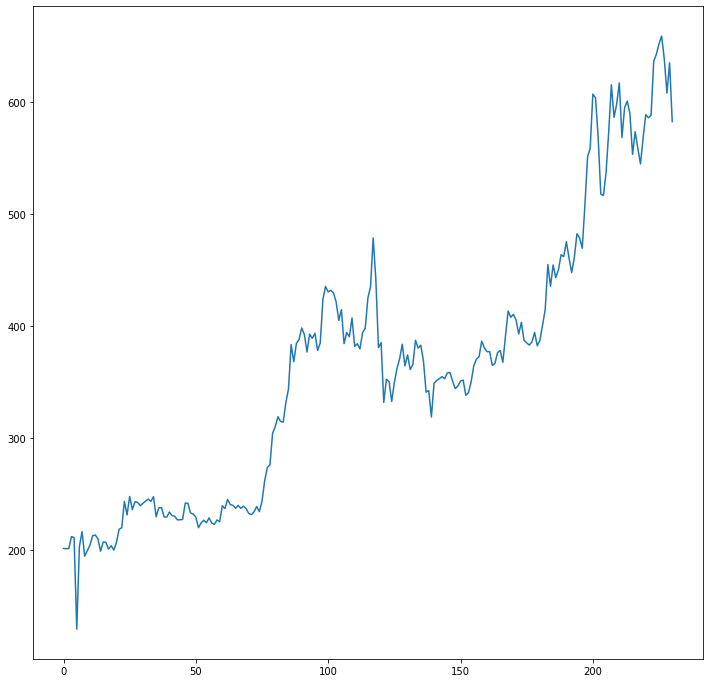

In [200]:
f, ax = plt.subplots(1,1,figsize=(12,12))
time, eth_value = ethereum_data()
cut_point = np.argmin(abs(time - datetime.datetime(2020,12,23)))
#metadata = {"cut_date": eth_value[cut_point]}
eth_value = eth_value[:cut_point+1]
today = time[-1]
ax.plot(eth_value)
ax.plot()

In [216]:
inp = {}
inp['historic_point'] = 100
if hasattr(inp, "historic_point"):
        print(inp["historic_point"])